# Clustering
Clustering is the exercise of grouping datapoints with no knowledge of their labels.

## k-means
By far the most popular method for clustering is the humble k-means clustering.

The k-means algorithm works by iteratively assigning points to clusters, calculating the means of those clusters, then reassigining points to clusters based upon those new means.

In [1]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import k_means

The iris dataset comes with labels. We're going to try and recover these groups using unsupervised methods.

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
class_df = pd.DataFrame(pd.to_numeric(iris.target), columns = ['class'])
iris_df = pd.concat((iris_df, class_df), axis=1)

In [3]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [4]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


### A little feature exploration

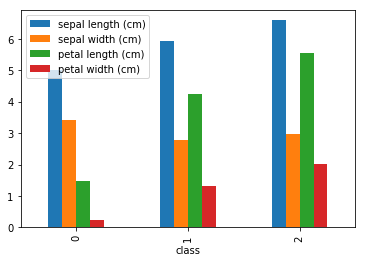

In [5]:
iris_df.groupby('class').mean().plot.bar()
plt.show()

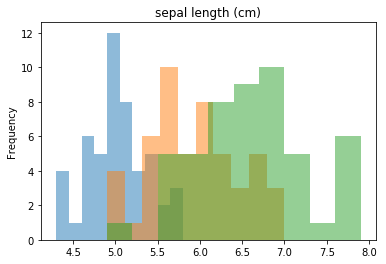

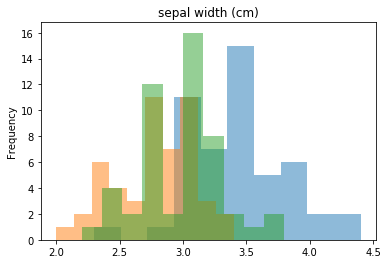

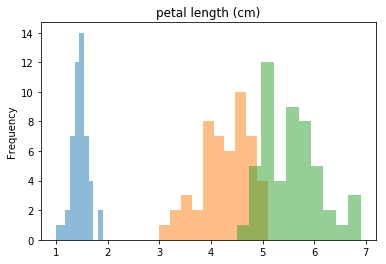

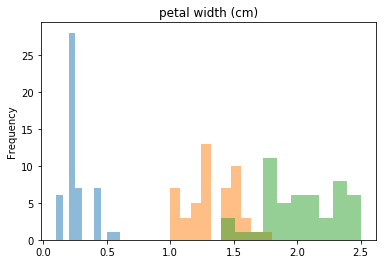

In [11]:
for c in iris_df.columns[:-1]:
    iris_df.groupby('class')[c].plot.hist(alpha=0.5)
    plt.title(c)
    plt.show()

We can see there's plenty of information distinguishing the classes in the features we have.

### Apply the clustering

In [20]:
X = iris_df.as_matrix()[:, :-1] # Don't include the class column
km_result = k_means(X, n_clusters=3)

## Let's look at our results

The centroids are the `means` referred to in `k-means`. They're the centre of our clusters.

Note that we had 4 dimensions, so these are points in 4D space. Thus hard to visualize, but we can map them back onto our histograms from earlier:

In [21]:
centroids = km_result[0]
print(centroids)

In [30]:
len(centroids)

3

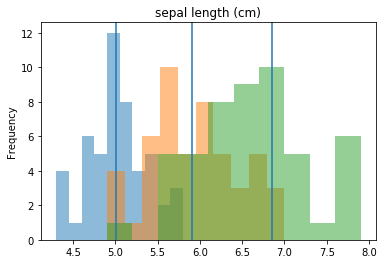

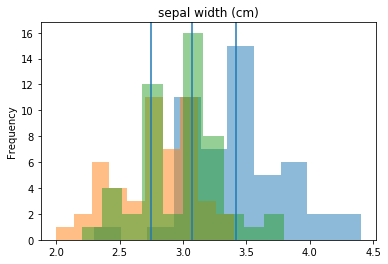

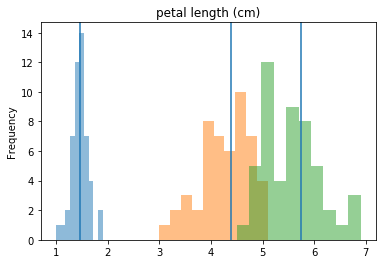

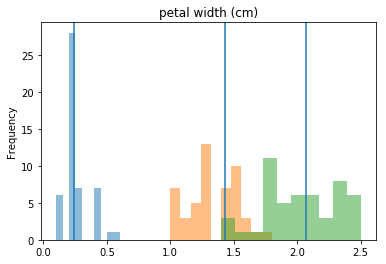

In [33]:
for i, c in enumerate(iris_df.columns[:-1]):
    iris_df.groupby('class')[c].plot.hist(alpha=0.5)
    for cluster in centroids:
        plt.axvline(cluster[i])
    
    plt.title(c)
    plt.show()

These are the predicted clusters for our data:

In [23]:
clusters = km_result[1]

How do they stack up against our true classes?

In [29]:
match = sum(clusters == iris_df['class'].values)
print(f"There are {match} out of 150 data points, i.e. accuracy of {match/150*100}")

There are 134 out of 150 data points, i.e. accuracy of 89.33333333333333


### Visualizing our clusters

We need to do some dimensionality reduction so we can visualize our clusters in 2D. I'll use t-sne, but MDS or PCA would also work well here.

In [40]:
from sklearn.manifold.t_sne import TSNE

In [49]:
t_sne_embedder = TSNE(n_components=2, 
                     perplexity=10)

In [50]:
embedded = t_sne_embedder.fit_transform(X)

In the plot below, each datapoint is a flower, and each colour corresponds to a different class predicted by our k-means clustering.


Text(0.5,1,'2D t-sne of iris dataset, coloured by k-means cluster')

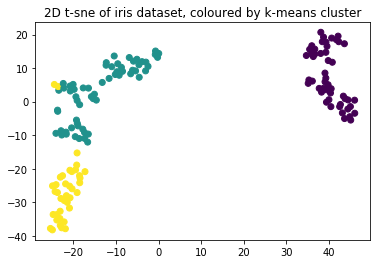

In [59]:
plt.scatter(embedded[:,0],
           embedded[:,1],
           c=clusters)
plt.title('2D t-sne of iris dataset, coloured by k-means cluster')